<a href="https://colab.research.google.com/github/kwakyosong/KOSA_KDT/blob/main/KDT_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [3]:
# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (5,5)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

In [19]:
# 데이터 불러오기
iris = datasets.load_iris()
print("iris dataset = \n", iris.keys())

#print(iris["feature_names"])
print(iris['data'])

iris dataset = 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv


In [24]:
data = iris.data
target = iris.target

print('feature name = ' , iris.feature_names)
print('data = \n' , data[:10])
print('target = \n' , iris.target_names)
print('y = \n' , target)

feature name =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data = 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
target = 
 ['setosa' 'versicolor' 'virginica']
y = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


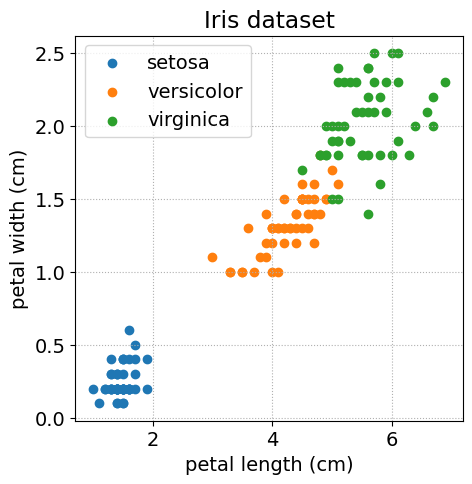

In [25]:
setosa = data[target == 0]
versicolor = data[target == 1]
virginica = data[target == 2]

# --- 산점도(Scatter Plot) 그리기 ---
plt.scatter(setosa[:, 2], setosa[:, 3], label = "setosa")
plt.scatter(versicolor[:, 2], versicolor[:, 3], label = "versicolor")
plt.scatter(virginica[:, 2], virginica[:, 3], label = "virginica")
plt.title("Iris dataset")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.legend()
plt.show()

In [36]:
# Scikit-learn 라이브러리에서 DecisionTreeClassifier 클래스를 가져옵니다.
from sklearn.tree import DecisionTreeClassifier

tree_iris = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_iris.fit(data, target)

DecisionTreeClassifier(max_depth=3, random_state=42)

Feature Importances:
[0.    0.    0.586 0.414]

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.586
petal width (cm): 0.414


<Axes: >

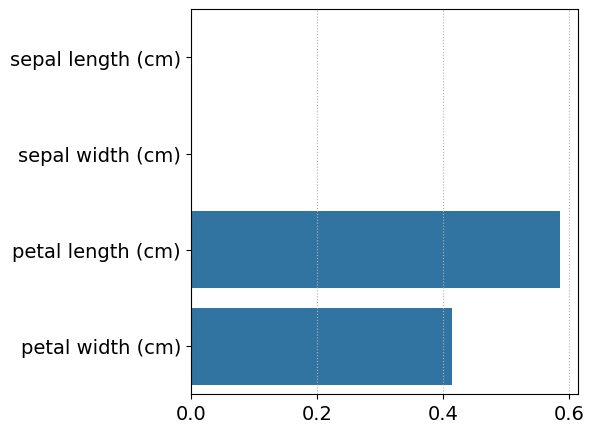

In [37]:
# 1. 학습된 의사 결정 나무 모델(tree_iris)에서 각 특성의 중요도를 추출합니다.
# feature_importances_ 속성은 특성의 개수만큼의 배열을 반환하며,
# 값의 총합은 1입니다. 값이 높을수록 분류에 중요한 특성입니다
print("Feature Importances:\n{0}\n".format(np.round(tree_iris.feature_importances_, 3)))


# 2. 붓꽃 데이터의 특성 이름(iris.feature_names)과 중요도 값(tree_iris.feature_importances_)을 묶어(zip) 순회합니다.
for name, value in zip(iris.feature_names, tree_iris.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

# 3. Seaborn 라이브러리의 barplot을 사용하여 특성 중요도를 막대 그래프로 시각화합니다.
sns.barplot(x=tree_iris.feature_importances_, y=iris.feature_names)

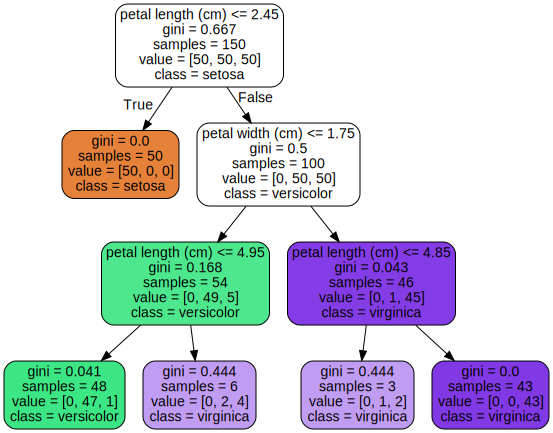

In [38]:
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(
        tree_iris,
        out_file=os.path.join(os.getcwd(), "iris_tree.dot"),
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
# export_graphviz 함수를 호출하여 tree_iris 모델을 .dot 파일로 변환합니다.
Source.from_file(os.path.join(os.getcwd(), "iris_tree.dot"))

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Deep learning library
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [42]:
def perceptron(x, nodes = 1):
    if not isinstance(x, np.ndarray):
        raise TypeError("Input must be a NumPy array.")
    if x.ndim < 2:
        x = x[np.newaxis, :]
    m, n = x.shape

    w = np.random.randn(nodes, n)
    b = np.random.rand(m)

    y = np.sum(w*x, 1) + b
    return y, w, b

x = np.array([1, 2, 3])

output, w, b = perceptron(x)

print("input = \n", x)
print("\noutput = \n", output)
print("\nw = \n", w)
print("\nb = \n", b)


input = 
 [1 2 3]

output = 
 [-2.28812786]

w = 
 [[-0.40722742 -0.35859934 -0.47578816]]

b = 
 [0.26366272]


In [45]:
def perceptron(x, nodes = 1):
    if not isinstance(x, np.ndarray):
        raise TypeError("Input must be a NumPy array.")
    if x.ndim < 2:
        x = x[np.newaxis, :]
    m, n = x.shape

    w = np.random.randn(nodes, n)
    b = np.random.rand(nodes,1)

    y = np.dot(w, x.T) + b
    return y, w, b

x = np.array([[1, 2, 3],
              [4, 5, 6]])

output, w, b = perceptron(x, 3)

print("input = \n", x)
print("\noutput = \n", output)
print("\nw = \n", w)
print("\nb = \n", b)

input = 
 [[1 2 3]
 [4 5 6]]

output = 
 [[ 7.80517846 15.64988589]
 [ 0.34388921  4.64687895]
 [ 5.8363713  15.79111676]]

w = 
 [[-0.27421888  1.17552558  1.71359578]
 [ 0.9850404   2.06143961 -1.61215009]
 [ 1.65162193  0.88605029  0.78057626]]

b = 
 [[0.58755884]
 [0.07241986]
 [0.07092   ]]
